In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
file = pd.read_csv('{}/ionosphere.data'.format(os.getcwd()),header = None)

In [ ]:
import numpy as np

data_set = file.values
for i in range(len(data_set)):
    data_set[i,-1] = 1.0 if data_set[i,-1] == 'b' else -1.0
data_set = np.array(list(data_set[:,:]), dtype=np.double)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_set[:,:-1],data_set[:,-1],train_size = 0.8)


In [ ]:
def LinearSVM(X,y,C = 1.0, learning_rate = 0.0001, epochs = 5000):
    w = np.random.rand(X.shape[1])
    b = 0
    loss = []
    for _ in range(epochs):
        margin = (np.dot(X,w)+b)*y
        misclassified = np.where(margin < 1)[0]
        
        dw = w - C*np.dot(y[misclassified],X[misclassified])
        w = w - learning_rate*dw
        
        db = - C*sum(y[misclassified])
        b = b - learning_rate*db
        
        ls = (1/2)*np.dot(w,w) + C*sum(max(0,1-m) for m in margin)
        loss.append(ls)
    
    support_vectors = np.where((np.dot(X,w)+b)*y <=1)[0]
    print(f'{len(support_vectors)} support vectors out of {len(X)} points')
    plt.plot([x for x in range(1,epochs+1)],loss, color = 'red')
    plt.xlabel('Epoch'); plt.ylabel('Loss');
    plt.show()
    return w,b

73 support vectors out of 280 points


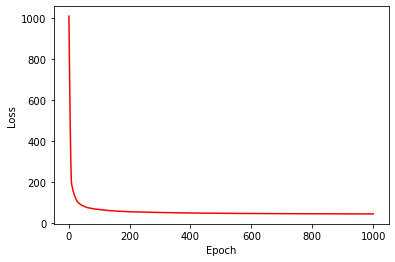

Testing Set Accuracy: 84.50704225352112 %


In [ ]:
w,b = LinearSVM(X_train,y_train, C = 0.8, learning_rate = 0.001, epochs = 1000)
y_pred = []
for x in X_test:
    y_pred.append(np.sign(np.dot(w,x)+b))
    
from sklearn.metrics import accuracy_score

print(f'Testing Set Accuracy: {accuracy_score(y_test,y_pred)*100} %')